# Analysing evolution of the simulation

In [33]:
import sys
sys.path.append("..")

from analysis.analysis_utils import extract_all_info_from_hdf5, list_all_hdf5
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dirpath = "../out/E3O2P21R12T17_S75_T0.6_M1000_N10000000/"
hdf5_list = list_all_hdf5(dirpath)
_, parameters = extract_all_info_from_hdf5(hdf5_list[-1])
size = parameters["Community size"]

In [35]:
list_adj_matrices = []
inter = []
for f in hdf5_list:
    adj_matrices, params = extract_all_info_from_hdf5(f)
    inter.append(params["Number of interaction"])
    list_adj_matrices.append(adj_matrices)
print(inter)

[np.int64(100000), np.int64(200000), np.int64(300000), np.int64(400000), np.int64(500000), np.int64(600000), np.int64(700000), np.int64(800000), np.int64(900000), np.int64(1000000), np.int64(1100000), np.int64(1200000), np.int64(1300000), np.int64(1400000), np.int64(1500000), np.int64(1600000), np.int64(1700000), np.int64(1800000), np.int64(1900000), np.int64(2000000), np.int64(2100000), np.int64(2200000), np.int64(2300000), np.int64(2400000), np.int64(2500000), np.int64(2600000), np.int64(2700000), np.int64(2800000), np.int64(2900000), np.int64(3000000), np.int64(3100000), np.int64(3200000), np.int64(3300000), np.int64(3400000), np.int64(3500000), np.int64(3600000), np.int64(3700000), np.int64(3800000), np.int64(3900000), np.int64(4000000), np.int64(4100000), np.int64(4200000), np.int64(4300000), np.int64(4400000), np.int64(4500000), np.int64(4600000), np.int64(4700000), np.int64(4800000), np.int64(4900000), np.int64(5000000), np.int64(5100000), np.int64(5200000), np.int64(5300000), n

### Evolution of the probabilities per game and agent

In [36]:
agent = 74
game = "PD"

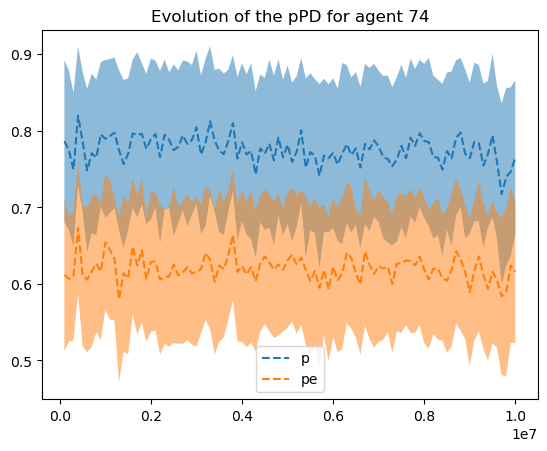

In [37]:
p = np.zeros(len(inter))
p_std = np.zeros(len(inter))
pe = np.zeros(len(inter))
pe_std = np.zeros(len(inter))
for j in range(len(inter)):
    p[j] = np.mean(list_adj_matrices[j]["p"+game][agent])
    p_std[j] = np.std(list_adj_matrices[j]["p"+game][agent])
    pe[j] = np.mean(list_adj_matrices[j]["pe"+game][agent])
    pe_std[j] = np.std(list_adj_matrices[j]["pe"+game][agent])
plt.plot(inter, p, "--", label="p")
plt.fill_between(inter, p - p_std/2, p+p_std/2, alpha=0.5)
plt.fill_between(inter, pe - pe_std/2, pe+pe_std/2, alpha=0.5)
plt.plot(inter, pe, "--", label="pe")
plt.title("Evolution of the p{0} for agent {1}".format(game, agent))
plt.legend()
plt.show()